In [19]:
# %matplotlib notebook
# %matplotlib widget
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib import animation

UsageError: Line magic function `%` not found.


In [ ]:
class Wave:
    center = [.5, .5]  # x, y
    frequency = [50, 70, 55, 100]  # Hz
    wave_number_x = [40, 80, 90, 100]  # 1/m
    wave_number_y = [40, 80, 70, 79]  # 1/m

    def __init__(self, x, y, t):
        self.x = x
        self.y = y
        self.t = t

    def __call__(self, *args, **kwargs):
        w = np.sin(
            np.sqrt((2 * np.pi * self.wave_number_x[0] * (self.x - self.center[0])) ** 2 + (
                    2 * np.pi * self.wave_number_y[0] * (self.y - self.center[1])) ** 2) + 2 * np.pi *
            self.frequency[0] * self.t)
        w += np.sin(
            np.sqrt((2 * np.pi * self.wave_number_x[1] * (self.x - self.center[0])) ** 2 + (
                    2 * np.pi * self.wave_number_y[1] * (self.y - self.center[1])) ** 2) + 2 * np.pi *
            self.frequency[1] * self.t)
        w += np.sin(
            np.sqrt((2 * np.pi * self.wave_number_x[2] * (self.x - self.center[0])) ** 2 + (
                    2 * np.pi * self.wave_number_y[2] * (self.y - self.center[1])) ** 2) + 2 * np.pi *
            self.frequency[2] * self.t)
        w += np.sin(
            np.sqrt((2 * np.pi * self.wave_number_x[3] * (self.x - self.center[0])) ** 2 + (
                    2 * np.pi * self.wave_number_y[3] * (self.y - self.center[1])) ** 2) + 2 * np.pi *
            self.frequency[3] * self.t)
        return w / 4


class Pulse:
    """
    y=exp(-(sqrt(x^2+y^2)-t)^2) * (sin(sqrt(x^2+y^2)-t)+cos(sqrt(x^2+y^2)-t))
    """
    center = [0, .5]  # x, y
    frequency = [30, 50, 80]  # Hz
    wave_number_x = [20, 40, 60]  # 1/m
    wave_number_y = [20, 40, 60]  # 1/m

    def __init__(self, x, y, t):
        self.x = x
        self.y = y
        self.t = t

    def __call__(self, *args, **kwargs):
        p = np.exp(
            - (np.sqrt(
                (2 * np.pi * self.wave_number_x[0] * (self.x - self.center[0])) ** 2 +
                (2 * np.pi * self.wave_number_y[0] * (self.y - self.center[1])) ** 2
            ) - 2 * np.pi * self.frequency[0] * self.t) ** 2
        )
        p *= np.sin(
            np.sqrt(
                (2 * np.pi * self.wave_number_x[1] * (self.x - self.center[0])) ** 2 +
                (2 * np.pi * self.wave_number_y[1] * (self.y - self.center[1])) ** 2
            ) - 2 * np.pi * self.frequency[1] * self.t
        ) + np.cos(
            np.sqrt(
                (2 * np.pi * self.wave_number_x[2] * (self.x - self.center[0])) ** 2 +
                (2 * np.pi * self.wave_number_y[2] * (self.y - self.center[1])) ** 2
            ) - 2 * np.pi * self.frequency[2] * self.t
        )
        return p / 2

In [20]:
sp = 257  # sampling points in 1d
t_max = 1  #s
x_max = 1  #m
y_max = 1  #m
dt = t_max / sp  # sampling interval (s)
dx = x_max / sp  # sampling interval (m)
dy = y_max / sp  # sampling interval (m)
sft = sp / t_max  # sampling temporal frequency (sampling points in 1s) t
sfx = sp / x_max  # sampling spatial frequency (sampling points in 1m) x
sfy = sp / y_max  # sampling spatial frequency (sampling points in 1m) y

print('sampling temporal frequency (sampling points in 1s) t', sft, 'Hz')
print('sampling spatial frequency (sampling points in 1m) x', sfx, '1/m')
print('sampling spatial frequency (sampling points in 1m) y', sfy, '1/m')

T = np.arange(0, t_max, dt)
X = np.arange(0, x_max, dx)
Y = np.arange(0, y_max, dy)
x, y = np.meshgrid(X, Y, indexing='ij')
z = np.zeros((len(X), len(Y), len(T)))

Signal = Pulse  # choose the signal to be analyzed
assert sft > 2 * max(
    Signal.frequency), f'Nyquist: Make sure sampling frequency(current:{sft}) > 2 * highest frequency of the signal(current:{2 * max(Signal.frequency)})'
assert sfx > 2 * max(
    Signal.wave_number_x), f'Nyquist: Make sure sampling frequency(current:{sfx}) > 2 * highest frequency of the signal(current:{2 * max(Signal.frequency)})'
assert sfy > 2 * max(
    Signal.wave_number_y), f'Nyquist: Make sure sampling frequency(current:{sfy}) > 2 * highest frequency of the signal(current:{2 * max(Signal.frequency)})'

for i, t in enumerate(T):
    z[:, :, i] = Signal(x, y, t)()

print('z.shape', z.shape)

sampling temporal frequency (sampling points in 1s) t 257.0 Hz
sampling spatial frequency (sampling points in 1m) x 257.0 1/m
sampling spatial frequency (sampling points in 1m) y 257.0 1/m
z.shape (257, 257, 257)


In [21]:
fps = sft
# fps = 10
print('fps', fps)

fps 257.0


C:\Users\parad1se\anaconda3\envs\waves\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


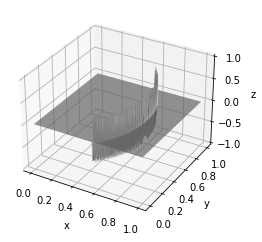

In [22]:
def change_plot(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, z_array[:, :, frame_number], cmap="viridis")


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surface = [ax.plot_surface(x, y, z[:, :, 128], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(-1, 1)
ani = animation.FuncAnimation(fig, change_plot, len(T), fargs=(z, surface), interval=1000 / fps)
plt.show()

In [ ]:
# from IPython.core.display import HTML
#
# HTML(ani.to_jshtml())

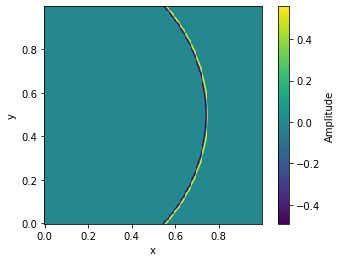

In [23]:
plt.close()


def change_plot_img(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax2.pcolormesh(x, y, z_array[:, :, frame_number], cmap='viridis')


fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
image = [ax2.pcolormesh(x, y, z[:, :, 128], cmap='viridis')]
ax2.set_aspect(x_max / y_max)
plt.colorbar(image[0], label='Amplitude')
ani2 = animation.FuncAnimation(fig2, change_plot_img, len(T), fargs=(z, image), interval=1000 / fps)
plt.show()

In [24]:
# HTML(ani2.to_jshtml())

In [25]:
KX = np.arange(-sfx / 2, sfx / 2, sfx / sp)
KY = np.arange(-sfy / 2, sfy / 2, sfy / sp)
FREQ = np.arange(0, sft, sft / sp)

In [ ]:
fft_result = np.fft.fftn(z)

In [ ]:
real_fft = fft_result.real
imag_fft = fft_result.imag

In [ ]:
abs_real_fft = np.abs(real_fft)
abs_imag_fft = np.abs(imag_fft)
abs_fft = np.abs(fft_result)

In [ ]:
# Shift the zero-frequency component to the center of the spectrum.
# Only shift kx and ky
shifted_fft = np.fft.fftshift(abs_fft, axes=(0, 1))

In [ ]:
plt.close()
fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.set_xlabel('Kx')
ax3.set_ylabel('Ky')
Kx, Ky = np.meshgrid(KX, KY, indexing='ij')
image_fft = ax3.pcolormesh(Kx, Ky, shifted_fft[:, :, 0], cmap='viridis')
# no need to limit valid range because done by shifting the result
# plt.xlim(-sfx / 2, sfx / 2)
# plt.ylim(-sfy / 2, sfy / 2)
# ax3.set_aspect(x / y)
fig3.colorbar(image_fft, label='Amplitude')
fig3.subplots_adjust(bottom=0.25)
ax_freq = plt.axes([0.20, 0.05, 0.65, 0.06])
freq_slider = Slider(
    ax=ax_freq,
    label='Freq',
    valmin=0,
    valmax=sft / 2,
    valinit=0,
    valstep=sft / sp,
)


def f_val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int((v) * t_max)


def update(val):
    ax3.pcolormesh(Kx, Ky, shifted_fft[:, :, f_val_to_idx(val)], cmap='viridis')
    fig3.canvas.draw_idle()


freq_slider.on_changed(update)
plt.show()

In [ ]:
def kx_val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int((v + sfx / 2) * x_max) - 1


plt.close()
fig4 = plt.figure()
ax4 = fig4.add_subplot()
ax4.set_xlabel('Kx')
ax4.set_ylabel('Freq')
Kx, Freq = np.meshgrid(KX, FREQ, indexing='ij')
image_fft_ky = ax4.pcolormesh(Kx, Freq, shifted_fft[:, kx_val_to_idx(0), :], cmap='viridis')
plt.ylim(0, sft / 2)  # set valid frequency window
# ax4.set_aspect(x / y)
fig4.colorbar(image_fft_ky, label='Amplitude')
fig4.subplots_adjust(bottom=0.25)
ax_ky = plt.axes([0.20, 0.05, 0.65, 0.06])
ky_slider = Slider(
    ax=ax_ky,
    label='ky',
    valmin=-sfy / 2,
    valmax=sfy / 2,
    valinit=0,
    valstep=sfy / sp,
)


def update_ky(val):
    ax4.pcolormesh(Kx, Freq, shifted_fft[:, kx_val_to_idx(val), :], cmap='viridis')
    fig4.canvas.draw_idle()


ky_slider.on_changed(update_ky)
plt.show()

In [ ]:
def ky_val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int((v + sfy / 2) * y_max)


plt.close()
fig5 = plt.figure()
ax5 = fig5.add_subplot()
ax5.set_xlabel('Ky')
ax5.set_ylabel('Freq')
Ky, Freq = np.meshgrid(KY, FREQ, indexing='ij')
image_fft_kx = ax5.pcolormesh(Ky, Freq, shifted_fft[ky_val_to_idx(0), :, :], cmap='viridis')
plt.ylim(0, sft / 2)  # set valid frequency window
# ax5.set_aspect(x / y)
plt.colorbar(image_fft_kx, label='Amplitude')
plt.subplots_adjust(bottom=0.25)
ax_kx = plt.axes([0.20, 0.05, 0.65, 0.06])
kx_slider = Slider(
    ax=ax_kx,
    label='kx',
    valmin=-sfx / 2,
    valmax=sfx / 2,
    valinit=0,
    valstep=sfx / sp,
)


def update_kx(val):
    ax5.pcolormesh(Ky, Freq, shifted_fft[ky_val_to_idx(val), :, :], cmap='viridis')
    fig5.canvas.draw_idle()


kx_slider.on_changed(update_kx)
plt.show()

In [ ]:
mask = np.zeros((sp, sp, sp))
cx, cy, cf = kx_val_to_idx(sfx / 2), ky_val_to_idx(sfy / 2), 0
mask[:, :, :]

In [ ]:
ifft_result = np.fft.ifftn(fft_result).real

In [ ]:
plt.close()


def change_plot_img(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax6.pcolormesh(x, y, z_array[:, :, frame_number], cmap='viridis')


fig6 = plt.figure()
ax6 = fig6.add_subplot()
ax6.set_xlabel('x')
ax6.set_ylabel('y')
image = [ax6.pcolormesh(x, y, ifft_result[:, :, 128], cmap='viridis')]
ax6.set_aspect(x_max / y_max)
plt.colorbar(image[0], label='Amplitude')
ani3 = animation.FuncAnimation(fig6, change_plot_img, len(T), fargs=(ifft_result, image), interval=1000 / fps)
plt.show()